# Machine Learning: A Primer for Radiologists

## Contents

* Machine Learning Basics
* Machine Learning Workflow
* Commonly Used Models
* Notes and Tips
* Applications in Radiology

### Machine Learning Basics
* Unsupervised and Supervised
* Bias and Variance
* Model Specification and Training
* Training and Testing
* Example: Linear Regression
  * Input and Output
  * Parameter Estimation
  * Training and Testing

#### Unsupervised and Supervised Learning

| Unsupervised | Supervised |
| :-------------: | :-------------:|
| Aims to "summarize" data  | Aims to "learn" a function or parameters of a function as a map between input data and output/prediction |
| Methods to reduce dimensionality of data | Methods to train a system for prediction |
| Clustering, Compression, Association Rules | Regression |

#### Supervised Learning

<table>
  <tr>
    <td> Classification by nearest neighbor voting </td>
    <th rowspan="2" style="width:40%"><img src="assets/images/knn_regression.png" alt='knn_regression'></th>
  </tr>
  <tr>
    <td> A function of 2-dimensional input space is "learned" based on the majority voting of the 15 nearest neighbors in the dataset. <p> $$Y(x_{1}, x_{2}) = \frac{1}{k} \sum_{x_{i} \in N_{k}(k)} y_{i}$$ </p> </td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<a href="#/2">Back to top</a>
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 2, Page 7</p>
</footer>

#### Unsupervised and Supervised Learning
<table>
  <tr>
    <td>These methods are not exclusive of each other and can compliment each other!</td>
    <th rowspan="2" style="width:55%"><img src="assets/images/gene_expression_regression.jpg" alt='gene_express'></th>
  </tr>
  <tr>
    <td>Example: reducing gene expression data to summarize the most important gene expression patterns of a dataset (unsupervised), which is then used to estimate survival (supervised).</td>
  </tr>
</table>


<footer id="attribution" style="float:left; color:#999; background:#fff;">
<a href="#/2">Back to top</a>
<p>Hastie T, Tibshirani R, Friedman J. The Elements of Statistical Learning, Data Mining, Inference, and Prediction. Springer Science & Business Media; 2013. Chapter 16 Page 29</p>
</footer>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

x = np.linspace(0, 500.0, num=50)
x += abs(x.min()) + 1.0
y = np.log(x) + np.random.normal(scale=0.25,size=(x.size,))

p_lin = np.polyfit(x, y, 1)
p_high = np.polyfit(x, y, 32)
p_lin_y = np.polyval(p_lin, x)
p_high_y = np.polyval(p_high, x)

/home/matt/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:10: RankWarning: Polyfit may be poorly conditioned


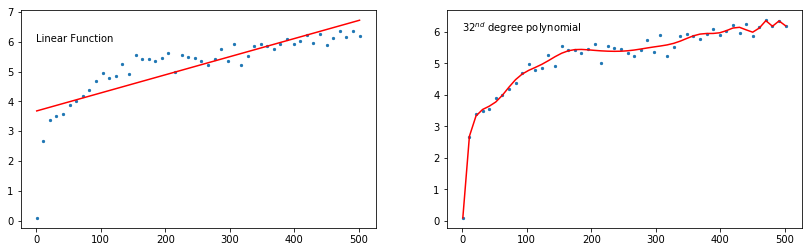

In [2]:
fig = plt.figure(figsize=(14,4))
plt.subplot(121)
plt.scatter(x, y, s=5)
plt.text(0.05, 6.0, 'Linear Function')
plt.plot(x, p_lin_y, color='r')

plt.subplot(122)
plt.scatter(x, y, s=5)
plt.plot(x, p_high_y, color='r')
plt.text(0.05, 6.0 , '$32^{ nd }$ degree polynomial')
fig.savefig(os.path.join('assets', 'images', 'bias_var.png'), bbox_inches='tight')
plt.show()

 <h2> <center> <left> High bias </left> vs  <right> high variance </right>  </center> </h2>

![pic](assets/images/bias_var.png)

In [3]:
def cost(predictions, ground_truth):
    total_cost = 0.0
    for i in range(len(predictions)):
        total_cost += (1.0 / 2.0) * (predictions[i] - ground_truth[i])**2.0
    
    total_cost /= float(len(predictions))
    return total_cost
    

def hypothesis_function(m, x, b):
    h = m * x + b
    return h

def gradients(m, b, x, ground_truth):
    m_gradient = 0.0
    b_gradient = 0.0
    
    predictions = []
    
    for i in range(len(x)):
        predictions.append(hypothesis_function(m, x[i], b))
    
    for i in range(len(x)):
        error = predictions[i] - ground_truth[i]
        m_gradient += error * x[i]
        b_gradient += error * 1.0
        
    m_gradient /= float(len(x))
    b_gradient /= float(len(x))
    
    return m_gradient, b_gradient

def update_parameters(m, b, m_gradient, b_gradient, alpha):
    m_updated = m - (m_gradient * alpha)
    b_updated = b - (b_gradient * alpha)
    
    return m_updated, b_updated


def run_gradient_descent(x, y, m_init, b_init, alpha=0.01, num_iteration=1500, tol=1e-4):
    
    m = m_init
    b = b_init
    
    m_vals = []
    b_vals = []
    costs = []
    
    for iteration_num in range(num_iteration):
        #save the current values of m and b
        m_vals.append(m)
        b_vals.append(b)
        
        #make our predictions
        predictions = []
        for i in range(len(x)):
            predictions.append(hypothesis_function(m, x[i], b))
        
        #compute the cost and save it
        current_cost = cost(predictions, y)
        costs.append(current_cost)
        
        if current_cost < tol: #check if we are done
            break
        else: 
            #compute the gradients
            m_grad, b_grad = gradients(m, b, x, y)
        
            #update parameters m and b
            m_new, b_new = update_parameters(m, b, m_grad, b_grad, alpha)
 
            #reset m and b
            m = m_new
            b = b_new
            
    return m_vals, b_vals, costs
        
        
    

#### Supervised Learning Through Gradient Descent

* Core concept in ML
* Main idea:
    1. Specify a model
    2. Make an initial guess at the model parameters
    3. Measure the error associated with the current model parameters
    4. Adjust model parameters to reduce error on the next round of prediction
    5. Repeat steps 1-4 until the error is minimized over a model and datas set

#### Supervised Learning Through Gradient Descent
* Pieces of machinery that are needed:
    1. A method for measuring the error associated with our guesses
    2. A method to adjust the model parameters so that future predictions are better

* A few definitions

$$
X := \text{input data, which is a set of examples such that } x^{(i)} \in X \text{ for } i=1 .. N
\\
Y := \text{output data, or what we are trying to predict such that } y^{(i)} \in Y \text{ for } i=1..N
\\
\Theta := \text{model parameters (unspecified before training)}
\\
M(X, \Theta) := \text{the model, which takes } X \text{ and } \Theta \text{ as input to attempt to predict the output }Y
\\
J(M(X, \Theta), Y) := \text{the error or "cost" function, which compares model prediction to desired output}
$$

#### Supervised Learning Through Gradient Descent
A common choice for the cost function is the squared difference function

$$ 
\begin{align}
\\
J(M(X, \Theta), Y) & =  \frac{1}{2N} \sum_{i=1}^{N} (M(x^{(i)}, \Theta) - y^{(i)})^{2} &
\\
\end{align}
$$

#### Supervised Learning Through Gradient Descent
One reason is because this function, when taking the derivative with respect to $\Theta$ has a simple form:

$$\frac{\partial J}{\partial \Theta} = \frac{1}{N}\sum_{i=1}^{N} (M(x^{(i)}, \Theta) - y^{(i)})^{2} \frac{\partial M}{\partial \Theta} $$

#### Supervised Learning Through Gradient Descent
* We still need a method for updating the model parameters to reduce the error on future iterations
* The crux of the idea of Gradient Descent is to use the derivative of the cost function to "nudge" the parameters $\Theta$ in the right direction
* This is typically done by measuring the gradient and then multiplying the gradient by some small value $\alpha$, and subtracting it from the current value of $\Theta$

$$\Theta_{j+1} = \Theta_{j} - \alpha \frac{\partial J}{\partial \Theta}$$
<center>where $\Theta_{j}$ is the value of $\Theta$ on the $j^{\text{th}}$ iteration of the algorithm</center>


#### Supervised Learning Through Gradient Descent
* Let's walk through a concrete example
* Let's use gradient descent with a linear model

#### Supervised Learning Through Gradient Descent
* One of the most well known cases - linear regression
* Task is to "learn" the values of a linear model that best fits the data

<br>
<br>
 <center> $$ Y = mx + b $$ </center>
<br>
<br>

* Our goal here is to estimate what values of $m$ and $b$ best fit the data

* Therefore the model function looks like this
$$M(X, m, b) = mX + b$$

* And the cost function has this form:
$$J(M(X,m,b), Y) = \frac{1}{2N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

and

$$\frac{\partial J}{\partial m} = \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2} x^{(i)} $$

and


$$\\ \frac{\partial J}{\partial b} = \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

So the update rules for our parameters becomes:

$$m_{j+1} = m_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2} x^{(i)}$$


and


$$b_{j+1+} = b_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

#### Supervised Learning Through Gradient Descent

Cost function equation:

$$J(M(X,m,b), Y) = \frac{1}{2N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$


Cost function code:

```python
    def cost(predictions, ground_truth):
        total_cost = 0.0
        for i in range(len(predictions)):
            total_cost += (1.0 / 2.0) * (predictions[i] - ground_truth[i])**2.0

        total_cost /= float(len(predictions))
        return total_cost
```

#### Supervised Learning Through Gradient Descent

Model Equation:

$$M(X, m, b) = mX + b$$

Model Code:

```python
def hypothesis_function(m, x, b):
    h = m * x + b
    return h

```

#### Supervised Learning Through Gradient Descent

Gradient Equation:

$$J(M(X,m,b), Y) = \frac{1}{2N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

Gradient Code:

```python
def gradients(m, b, x, ground_truth):
    m_gradient = 0.0
    b_gradient = 0.0
    predictions = []
    for i in range(len(x)):
        predictions.append(hypothesis_function(m, x[i], b))
    
    for i in range(len(x)):
        error = predictions[i] - ground_truth[i]
        m_gradient += error * x[i]
        b_gradient += error * 1.0
        
    m_gradient /= float(len(x))
    b_gradient /= float(len(x))
    return m_gradient, b_gradient
```

#### Supervised Learning Through Gradient Descent
Parameter update equations:

$$m_{j+1} = m_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2} x^{(i)}$$


and


$$b_{j+1+} = b_{j} - \alpha \frac{1}{N} \sum_{i=1}^{N} ((mx^{(i)}+b) - y^{(i)})^{2}$$

Parameter update code:

```python
def update_parameters(m, b, m_gradient, b_gradient, alpha):
    m_updated = m - (m_gradient * alpha)
    b_updated = b - (b_gradient * alpha)
    
    return m_updated, b_updated
```

#### Supervised Learning Through Gradient Descent
```python
def run_gradient_descent(x, y, m_init, b_init, alpha=0.01, num_iteration=1500, tol=1e-4):
    m = m_init
    b = b_init
    m_vals = []
    b_vals = []
    costs = []
    
```

```python
    for iteration_num in range(num_iteration):
        #save the current values of m and b
        m_vals.append(m)
        b_vals.append(b)
        #make our predictions
        predictions = []
        for i in range(len(x)):
            predictions.append(hypothesis_function(m, x[i], b))
        #compute the cost and save it
        current_cost = cost(predictions, y)
        costs.append(current_cost)
        if current_cost < tol: #check if we are done
            break
        else: 
            #compute the gradients
            m_grad, b_grad = gradients(m, b, x, y)
            #update parameters m and b
            m_new, b_new = update_parameters(m, b, m_grad, b_grad, alpha)
            #reset m and b
            m = m_new
            b = b_new
    return m_vals, b_vals, costs
```

#### Supervised Learning Through Gradient Descent
* Lets see it in action!


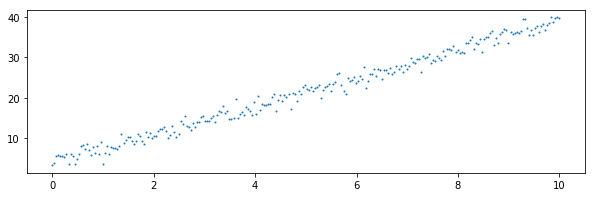

In [138]:
m_true = 3.5
b_true = 4.0
x = np.linspace(0, 10.0, num=250)
y = x * m_true + b_true + np.random.normal(scale=1.3,size=(x.size,))
fig = plt.figure(figsize=(10, 3))
plt.scatter(x, y,s=1.0)
plt.show()

In [133]:
mv, bv, c = run_gradient_descent(x, y, -2.0, 30.0, num_iteration=5000) #initalizes m=-2.0 and b=30.0

In [134]:

import plotly

idxs = range(0,len(mv), 500)

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 10], 'title': 'X'}
figure['layout']['yaxis'] = {'range':[0,45], 'title': 'Y'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 800
        }
    ],
    'plotlycommand': 'animate',
    'values': idxs,
    'visible': True
}
figure['layout']['width'] = '700'

figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 800, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 800}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': -1,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': '',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 800},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}




for idx in [idxs[0]]:
    y_hat = mv[idx] * x + bv[idx]
    
    data_dict = {'x':x,
                 'y':y_hat,
                 'name':'Model',
                 'line':dict(width=4)}
    
    figure['data'].append(data_dict)
    
figure['data'].append({'x':x, 'y':y,'mode':'markers','name':"Data",'marker':dict(color='green')})

    
#make frames
for idx in idxs:
    frame = {'data': [], 'name': str(idx)}
    
    y_hat = mv[idx] * x + bv[idx]
    
    data_dict = {'x':x,
                 'y':y_hat}
    
    frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [idx],
        {'frame': {'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 800}}
     ],
     'label': 'Iteration: {i} | {cmv:.2f}x + {cbv:.2f}'.format(cmv=mv[idx], cbv=bv[idx], i=idx),
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]




In [139]:
plotly.offline.init_notebook_mode(connected=False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [140]:
plotly.offline.iplot(figure, show_link=False)

#### Supervised Learning Through Gradient Descent
* Based on the code, it looks like we got $m=3.51$ and $b=3.91$
* Not too shabby!
* This idea can be applied to any model function $M$ (as long as it has a continuous, well defined derivative)
* We used a linear function here, but it could be anything